In [1]:
import pandas as pd

import glob

path='c:\\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia'

files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]

for f in files:
    print(f)

c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1000000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1000000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1400000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1400000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_400000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_400000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1400000_IF_1000000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1400000_IF_1000000_MF

In [2]:
def group_results(file,name):
    df_temp = pd.DataFrame()
    dict_temp = {}    

    for line in file:
        if 'make' in line:
            continue
        else:
            if ":" in line:
                #print(line.split(':')[1].replace('s',''))
                key, value = line.split(':')[0], float(line.split(':')[1].replace('s',''))
                dict_temp[key] =  float(value)
                #print(key,':',value)
            else: 
                if 'm' in line:
                    key = line.split('\t')[0]
                    mi = int(line.split('\t')[1].split('m')[0])
                    se = float(line.split('\t')[1].split('m')[1].replace('s',''))
                    value = mi*60 + se
                    dict_temp[key] =  float(value)
                    #print(key,':',value)
                    if "sys" in line:
                        df_temp = df_temp.append(dict_temp, ignore_index=True)
                        dict_temp = dict.fromkeys(dict_temp, 0)

    df_temp = df_temp.mean().to_dict()
    
    app = name.split('\\')[-1].split('_')[0]
    Host = name.split('_')[2]
    Host_Freq = int(name.split('_')[4])
    Idle_Freq = int(name.split('_')[6])
   
    if Host == 'A15':
        A15_Freq = Host_Freq
        A7_Freq = Idle_Freq
        
    if Host == 'A7':
        A7_Freq = Host_Freq
        A15_Freq = Idle_Freq
        
    if(int(name.split('_')[10]) == 0):
        dev = 'GPU'
    else:
        dev = Host
        
    GPU_Freq = 600000000.0   
    
    df_temp['App'] = app
    df_temp['Host'] = Host
    df_temp['Dev'] = str(dev)
    df_temp['A15_Freq'] = A15_Freq
    df_temp['A7_Freq'] = A7_Freq
    df_temp['GPU_Freq'] = GPU_Freq
    #df_temp['Idle1_Freq'] = idle1_freq
    #df_temp['Idle2'] = idle2_dev
    #df_temp['Idle2_Freq'] = idle2_freq
    
    return df_temp

In [3]:
df = pd.DataFrame()

for path in files:
    log_data=open(path,'r')
    temp_dict = group_results(log_data, path)
    df = df.append(temp_dict, ignore_index=True)
    col = df['GPU_Freq']
    df.drop(labels=['GPU_Freq'], axis=1,inplace = True)
    df.insert(0, 'GPU_Freq', col)
    col = df['A7_Freq']
    df.drop(labels=['A7_Freq'], axis=1,inplace = True)
    df.insert(0, 'A7_Freq', col)
    col = df['A15_Freq']
    df.drop(labels=['A15_Freq'], axis=1,inplace = True)
    df.insert(0, 'A15_Freq', col)
    col = df['Dev']
    df.drop(labels=['Dev'], axis=1,inplace = True)
    df.insert(0, 'Dev', col)
    col = df['Host']
    df.drop(labels=['Host'], axis=1,inplace = True)
    df.insert(0, 'Host', col)
    col = df['App']
    df.drop(labels=['App'], axis=1,inplace = True)
    df.insert(0, 'App', col)


In [4]:
to_remove = ['App','Host','Dev','A15_Freq','A7_Freq','GPU_Freq','real','sys','user']
df['Total_Acumulada'] = df.loc[:,~df.columns.isin(to_remove)].sum(axis=1)

df['EDP'] = df['Total_Acumulada']*df['real']
df['A15_Power'] = df['A15_Acumulada']/df['real']
df['A7_Power'] = df['A7_Acumulada']/df['real']
df['MEM_Power'] = df['MEM_Acumulada']/df['real']
df['GPU_Power'] = df['GPU_Acumulada']/df['real']
df['A15_Freq'] = (df['A15_Freq'].astype(float) / 1000000).map('{0:g}'.format).astype(str)
df['A7_Freq'] = (df['A7_Freq'].astype(float) / 1000000).map('{0:g}'.format).astype(str)
df['GPU_Freq'] = (df['GPU_Freq'].astype(float) / 1000000000).map('{0:g}'.format).astype(str)
#df = df.sort_values(['A15_Freq','A7_Freq'])
df.loc[:500]

App Host  Dev A15_Freq A7_Freq GPU_Freq  A15_Acumulada  \
0      2DCONV  A15  GPU        1       1      0.6       3.359609   
1      2DCONV  A15  A15        1       1      0.6       4.311673   
2      2DCONV  A15  GPU        1     1.4      0.6       3.257579   
3      2DCONV  A15  A15        1     1.4      0.6       4.421417   
4      2DCONV  A15  GPU        1     0.4      0.6       3.651329   
..        ...  ...  ...      ...     ...      ...            ...   
496  GRAMSCHM  A15  GPU        2     0.4      0.6      66.644520   
497  GRAMSCHM  A15  A15        2     0.4      0.6    1540.533000   
498  GRAMSCHM  A15  GPU      0.4       1      0.6      10.717892   
499  GRAMSCHM  A15  A15      0.4       1      0.6     463.180700   
500  GRAMSCHM  A15  GPU      0.4     1.4      0.6       9.611543   

     A7_Acumulada  GPU_Acumulada  MEM_Acumulada       real      sys  \
0        0.393837       0.413309       0.543915     6.0376   1.1083   
1        0.423279       0.404772       0.660535     6.1519   1.0010   
2        0.727040       0.417100       0.515334     6.0206   1.0839   
3        0.821155       0.404862       0.653591     6.1184   0.9802   
4        0.156945       0.549125       0.608304     6.1716   1.1871   
..            ...            ...            ...        ...      ...   
496      1.147869      44.244240      13.312060    42.0715   0.9434   
497     17.645110      26.939430     148.455000   431.3156  15.0762   
498      2.837745      44.552600      13.465440    44.2542   2.4659   
499     89.170380      64.171520     207.667600  1117.9817  17.3381   
500      5.503921      44.455960      13.361600    44.1913   2.3670   

          user  Total_Acumulada            EDP  A15_Power  A7_Power  \
0       4.7077         4.710669      28.441137   0.556448  0.065231   
1       5.7060         5.800258      35.682610   0.700869  0.068805   
2       4.7250         4.917054      29.603614   0.541072  0.120759   
3       5.7242         6.301024      38.552188   0.722643  0.134211   
4       4.7486         4.965702      30.646328   0.591634  0.025430   
..         ...              ...            ...        ...       ...   
496     0.6812       125.348689    5273.607369   1.584078  0.027284   
497  1358.4698      1733.572540  747716.880234   3.571707  0.040910   
498     2.2582        71.573677    3167.435817   0.242189  0.064124   
499  3561.2348       824.190200  921429.560919   0.414301  0.079760   
500     2.2459        72.933024    3223.005143   0.217499  0.124548   

     MEM_Power  GPU_Power  
0     0.090088   0.068456  
1     0.107371   0.065796  
2     0.085595   0.069279  
3     0.106824   0.066171  
4     0.098565   0.088976  
..         ...        ...  
496   0.316415   1.051644  
497   0.344191   0.062459  
498   0.304275   1.006743  
499   0.185752   0.057399  
500   0.302358   1.005989  

[501 rows x 19 columns]

In [5]:
def Type(x):
    if '2DCONV' in x or '3DCONV' in x:
        return 'Convolution'  
    elif '2MM' in x or '3MM' in x or 'ATAX' in x or 'BICG' in x or 'GEMM' in x or 'GESUMMV' in x or 'GRAMSCHM' in x or 'MVT' in x or 'SYR2K' in x or 'SYRK' in x:
        return 'Linear Algebra' 
    elif 'CORR' in x or 'COVAR' in x:
        return 'Datamining' 
    elif 'FDTD-2D' in x:
        return 'Stencils' 

df['Config'] = 'A15'+': '+df['A15_Freq'].astype(str)+" GHz"+ ' | ' + 'A7'+': '+df['A7_Freq'].astype(str)+" GHz"+' | '+'GPU'+': '+ df['GPU_Freq'].astype(str)+" GHz"
df["Type"] = df["App"].apply(Type)    

In [6]:
apps = list(set(df['App']))
df_config_plot = pd.DataFrame()

for app in apps:
    df_edp = df[df['App'] == app]
    df_edp = df_edp.sort_values('EDP')
    df_edp = df_edp.reset_index()
    
    to_add = []
    for i in range(48):# max 48
        to_add.append(df_edp.iloc[i])
        
    df_config_plot = df_config_plot.append(to_add, ignore_index=True)
    df_config_plot = df_config_plot.drop(columns=['index'])


c:\users\dougw\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


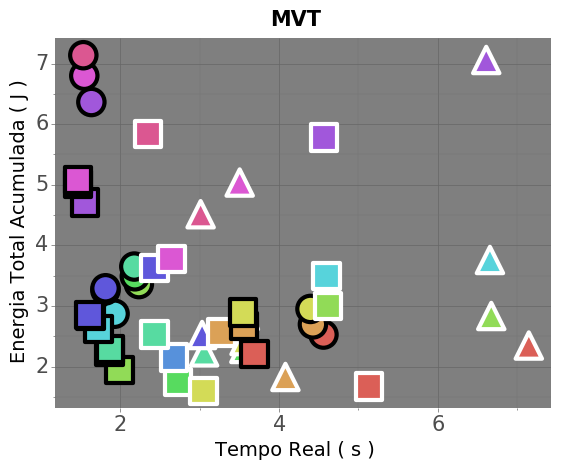

<ggplot: (90841073128)>

In [22]:
from plotnine import *
dict_plot = {}
for app in apps:
    dict_plot[app] = (ggplot(df_config_plot[df_config_plot['App'] == app], aes(x='real', y='Total_Acumulada',fill = 'Config', shape = 'Dev',colour = 'Host')) +\
         geom_point(size = 9, stroke = 1.7) +\
         scale_color_manual(values=("#000000", "#FFFFFF")) +\
         guides(size = False, stroke = False) +\
         guides(fill = False, colour = False, shape = False) +\
         labs(x = "Tempo Real ( s )",\
              y = 'Energia Total Acumulada ( J )',\
              title = app,# + " - " + df_config_plot[df_config_plot['App'] == app]['Type'].iloc[1],\
              subtitle = "teste",\
              fill = 'Configurações',\
              shape = 'Devices' ) +\
         #facet_wrap(["App","Type"], scales = "free",ncol=3,nrow=5) +\
         theme_dark() +\
         theme(\
                plot_title = element_text(colour = 'Black', size=15, face = 'bold'),\
                axis_text_x = element_text(angle=0, hjust=0.5,size=15),\
                axis_text_y = element_text(angle=0, hjust=1,size=15),\
                axis_title = element_text(size=14),\
                #legend_position = "bottom",\
                legend_title = element_text(size=14),\
                legend_text = element_text(colour="black", size = 10, face = "normal"))# +\
    )

dict_plot['MVT']

In [21]:
for app in apps:
    #dict_plot[app].save(app + '_idle_p.png')

SyntaxError: unexpected EOF while parsing (<ipython-input-21-229a6323852f>, line 2)